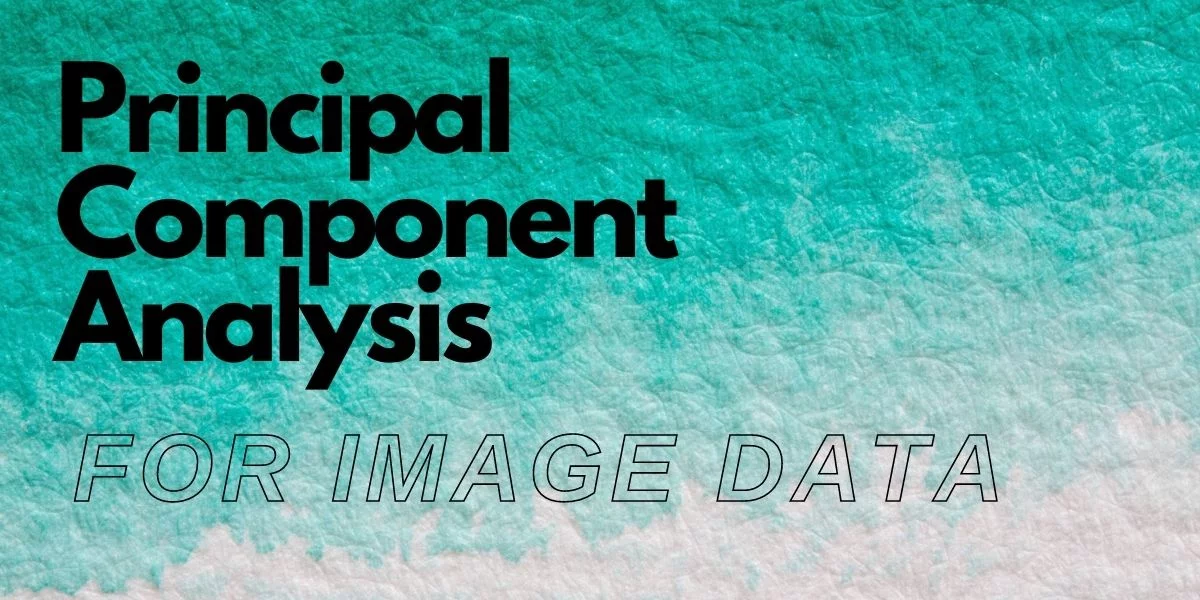

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data1=pd.DataFrame(digits.data)

In [4]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
X=digits.data
y=digits.target

In [6]:
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [7]:
from sklearn.preprocessing import StandardScaler
X=digits.data
#data Normalization
X_std=StandardScaler().fit_transform(X)

In [8]:
X_std.shape

(1797, 64)

In [9]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=np.cov(X_std.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [10]:
#create a list of(eigenvalue,eigenvector) tuples
eig_pairs =[ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
#sort from high to low
eig_pairs.sort(key =lambda x: x[0], reverse=True)
#calculation of explained variance from the eigenvalues
tot= sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals, reverse=True)] #Individual explained variance
cum_var_exp =np.cumsum(var_exp) #cumulative explained variance
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

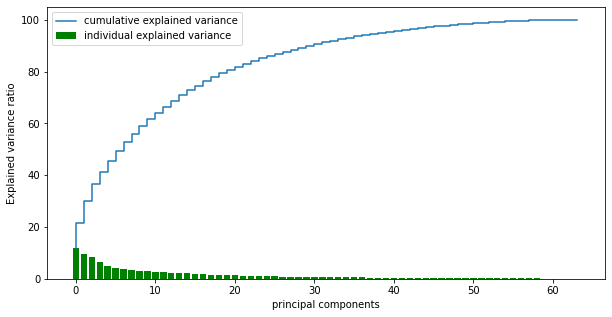

In [11]:
#how to decide the no of components

plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp,label='individual explained variance',color='g')
plt.step(range(len(cum_var_exp)),cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,train_size=0.8,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [14]:
pca=PCA(n_components=20)
pca_x_train=pca.fit_transform(x_train_std)
pca_x_test=pca.transform(x_test_std)

In [15]:
pca_x_train.shape

(1437, 20)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [17]:
y_pred=dt.predict(pca_x_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
acc=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
clrep=classification_report(y_pred,y_test)

In [20]:
print(acc)
print(cm)
print(clrep)

0.8416666666666667
[[34  0  0  1  0  0  0  0  0  3]
 [ 0 32  1  1  0  0  1  1  5  0]
 [ 0  0 31  2  0  0  0  2  1  1]
 [ 1  0  0 29  0  0  0  2  1  1]
 [ 0  0  1  0 35  0  0  4  0  1]
 [ 1  2  0  1  0 35  1  0  2  4]
 [ 0  0  1  0  0  0 33  0  0  0]
 [ 0  0  1  2  0  0  0 26  1  0]
 [ 0  1  0  0  0  0  1  0 23  1]
 [ 0  1  0  1  1  2  0  1  2 25]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.89      0.78      0.83        41
           2       0.89      0.84      0.86        37
           3       0.78      0.85      0.82        34
           4       0.97      0.85      0.91        41
           5       0.95      0.76      0.84        46
           6       0.92      0.97      0.94        34
           7       0.72      0.87      0.79        30
           8       0.66      0.88      0.75        26
           9       0.69      0.76      0.72        33

    accuracy                           0.84       360


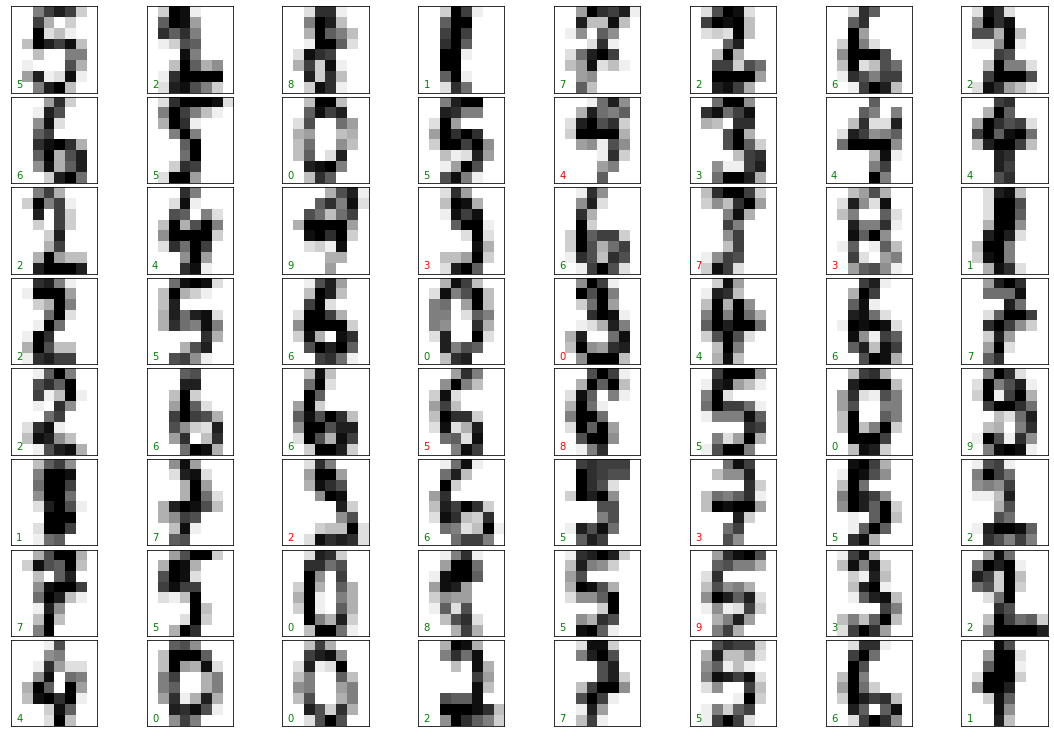

In [21]:
#plot the prediction
fig=plt.figure(figsize=(15,10)) #figure size in inches
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax=fig.add_subplot(8,8, i+1,xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1,8,8)[i], cmap=plt.cm.binary,interpolation='nearest')
    #label the image with the target value
    if y_pred[i]== y_test[i]:
        ax.text(0,7, str(y_pred[i]), color='green')
    else:
        ax.text(0,7, str(y_pred[i]), color='red')


In [22]:
cov_mat.min()

-0.5705136332381096

In [23]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
len(eig_vals)

64

In [24]:
cum_var_exp=np.cumsum(var_exp) #cumulative explained variance
cum_var_exp.max()

99.99999999999999

In [25]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
len(eig_vals)

64

In [26]:
#Explained variance
tot=sum(eig_vals) #total
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]  #individual explained variance
var_exp

[12.033916097734913,
 9.561054403097884,
 8.444414892624557,
 6.498407907524159,
 4.860154875966397,
 4.214119869271938,
 3.9420828035673843,
 3.3893809246383464,
 2.998221011625225,
 2.9320025512522196,
 2.781805463550333,
 2.5770550925819964,
 2.2753033157642566,
 2.227179739514341,
 2.1652294318492515,
 1.9141666064421297,
 1.7755470851681912,
 1.6380692742844243,
 1.596460168862344,
 1.489191187087821,
 1.3479695658179347,
 1.2719313702347457,
 1.165837350591949,
 1.057646598536318,
 0.975315947198107,
 0.9445589897319975,
 0.863013826970725,
 0.8366428536685141,
 0.7976932484112406,
 0.746471370926062,
 0.7255821513702749,
 0.6919112454811818,
 0.6539085355726169,
 0.6407925738459838,
 0.5913841117223411,
 0.5711624052235216,
 0.5236368034166345,
 0.4818075864451417,
 0.4537192598584498,
 0.42316275323277996,
 0.40605306997903756,
 0.39708480827582654,
 0.35649330314261707,
 0.3407871814703001,
 0.3278353352879542,
 0.31103200734535724,
 0.28857529410893384,
 0.2764892635235465,
 

In [27]:
cum_var_exp=np.cumsum(var_exp) #cumulative explained variance
cum_var_exp.max()

99.99999999999999

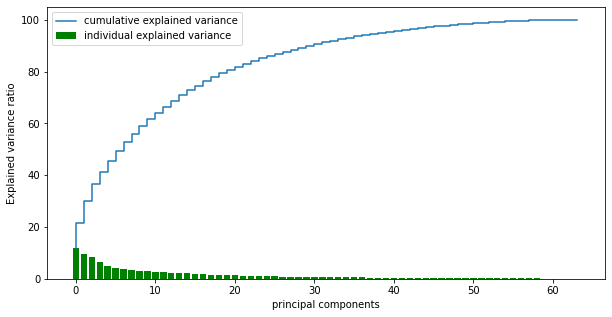

In [28]:
#how to decide the no of components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp,label='individual explained variance',color='g')
plt.step(range(len(cum_var_exp)),cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('principal components')
plt.legend()
plt.show()

In [29]:
explained_variance = pca.explained_variance_ratio_
explained_variance.max()

0.12039695276903764

In [30]:
wcss=[]
range_n_clusters=[2,3,4,5,6,7,8] #number of clusters
for n in range_n_clusters: #n=3
    kmeans= KMeans(n_clusters=n)  #KMeans(n=6)
    kmeans.fit(pca_x_train)
    wcss.append(kmeans.inertia_)
wcss

[61856.946160283456,
 56525.11498421869,
 52792.43783247821,
 49755.719736166415,
 46593.80431811748,
 43704.35529087608,
 41762.134659429896]

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(pca_x_train,kmeans.labels_)

0.17468805327030917

In [33]:
#final model with k=5
kmeans=KMeans(n_clusters=5)
kmeans.fit(pca_x_train)

KMeans(n_clusters=5)

In [34]:
kmeans.labels_

array([2, 3, 0, ..., 2, 1, 2])

In [35]:
pca_x_train

array([[-0.38500063,  1.77823362, -2.12200936, ...,  0.9195219 ,
        -1.44938057, -0.59557321],
       [ 3.14177535, -0.55549386, -2.80205649, ...,  0.22995124,
         0.6077197 ,  0.76406893],
       [-2.99532221,  2.28308746,  1.05912494, ..., -0.77095181,
         0.59418802,  0.3858764 ],
       ...,
       [ 0.47904576,  0.72789567, -3.61806028, ..., -0.13107038,
         1.10376611,  1.13764437],
       [ 1.51676922,  3.23266502,  0.47578888, ...,  0.14573925,
        -0.3006604 , -0.3494095 ],
       [-1.61666658, -2.31236369, -0.86063174, ..., -0.31016597,
        -0.24426027, -0.53568453]])

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_std,y,stratify=y,train_size=0.8,random_state=42)

In [37]:

from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier().fit(x_train,y_train)

In [38]:
y_pred1=Dt.predict(x_test)

In [39]:
y_pred1

array([5, 2, 8, 1, 7, 2, 6, 8, 6, 5, 0, 5, 9, 3, 8, 4, 2, 4, 7, 9, 6, 3,
       8, 8, 2, 5, 6, 0, 5, 4, 6, 7, 2, 6, 6, 5, 0, 5, 0, 3, 1, 7, 9, 6,
       5, 3, 5, 2, 7, 5, 0, 1, 5, 5, 3, 2, 0, 0, 0, 9, 7, 5, 6, 7, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 6, 2, 3, 5, 8, 9, 2, 7, 9, 6, 8, 3,
       0, 1, 2, 9, 4, 7, 1, 2, 8, 1, 4, 2, 6, 8, 3, 7, 3, 9, 6, 3, 1, 0,
       9, 2, 2, 6, 3, 8, 9, 7, 1, 0, 0, 4, 6, 5, 1, 2, 6, 1, 3, 0, 0, 8,
       6, 4, 3, 9, 3, 3, 3, 3, 8, 3, 0, 0, 1, 8, 5, 8, 3, 5, 0, 6, 6, 6,
       6, 1, 4, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
       9, 5, 7, 9, 9, 7, 3, 1, 9, 4, 4, 5, 3, 0, 4, 9, 7, 7, 5, 1, 5, 5,
       3, 4, 5, 4, 0, 2, 5, 5, 2, 2, 3, 8, 8, 9, 9, 4, 1, 0, 1, 4, 0, 5,
       5, 6, 6, 2, 4, 3, 8, 4, 2, 0, 7, 9, 2, 1, 4, 9, 4, 2, 4, 0, 0, 0,
       2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 5, 2, 3, 9, 2, 3, 0, 6, 8, 7,
       1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 7, 3, 3, 0, 3, 4, 1, 9, 7, 9,
       6, 3, 7, 1, 6, 9, 4, 7, 2, 8, 2, 3, 0, 5, 3,

In [40]:
y_test

array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5, 0, 5, 9, 3, 4, 4, 2, 4, 9, 9, 6, 3,
       8, 1, 2, 5, 6, 0, 3, 4, 6, 7, 2, 6, 6, 6, 6, 5, 0, 9, 1, 7, 9, 6,
       5, 7, 5, 2, 7, 5, 0, 8, 5, 5, 3, 2, 4, 0, 0, 2, 7, 5, 6, 1, 3, 7,
       6, 5, 7, 0, 9, 0, 3, 8, 2, 5, 8, 2, 3, 5, 9, 3, 2, 7, 9, 6, 8, 1,
       0, 1, 2, 9, 4, 9, 1, 2, 7, 8, 4, 2, 6, 9, 3, 7, 3, 9, 6, 1, 1, 0,
       9, 2, 1, 6, 3, 4, 8, 7, 1, 0, 0, 4, 6, 5, 8, 2, 8, 8, 3, 0, 0, 8,
       6, 4, 3, 9, 3, 3, 3, 3, 0, 7, 0, 0, 1, 9, 5, 8, 1, 5, 0, 6, 6, 6,
       6, 1, 7, 7, 6, 7, 7, 8, 7, 3, 6, 5, 9, 0, 3, 8, 0, 9, 8, 1, 9, 5,
       9, 5, 8, 9, 9, 7, 9, 1, 9, 5, 4, 7, 3, 0, 4, 9, 7, 7, 5, 6, 5, 8,
       3, 4, 5, 4, 9, 2, 5, 5, 2, 1, 3, 8, 8, 9, 3, 6, 1, 0, 1, 4, 0, 5,
       5, 6, 6, 7, 4, 3, 8, 4, 1, 0, 7, 9, 2, 8, 4, 8, 4, 2, 4, 0, 0, 0,
       2, 6, 7, 0, 4, 5, 2, 2, 9, 0, 4, 6, 8, 2, 3, 9, 2, 3, 0, 6, 8, 7,
       1, 4, 4, 1, 1, 6, 3, 8, 1, 2, 5, 7, 8, 3, 2, 0, 3, 4, 1, 9, 9, 9,
       6, 3, 7, 1, 6, 9, 4, 7, 1, 8, 1, 3, 0, 5, 3,

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
acc=accuracy_score(y_test,y_pred1)
cf=confusion_matrix(y_test,y_pred1)
clrep=classification_report(y_test,y_pred1)

In [43]:
print(acc)
print(cf)
print(clrep)

0.8333333333333334
[[35  0  0  0  0  0  0  0  1  0]
 [ 0 24  5  3  1  0  0  2  1  0]
 [ 0  0 30  3  0  0  0  0  1  1]
 [ 0  0  1 33  0  1  0  0  0  2]
 [ 1  1  0  0 32  0  0  0  2  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 1  1  0  1  1  1 31  0  0  0]
 [ 0  0  1  2  1  1  0 30  1  0]
 [ 0  5  0  0  0  2  2  2 22  2]
 [ 1  0  0  2  0  0  0  3  3 27]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.77      0.67      0.72        36
           2       0.81      0.86      0.83        35
           3       0.75      0.89      0.81        37
           4       0.89      0.89      0.89        36
           5       0.88      0.97      0.92        37
           6       0.94      0.86      0.90        36
           7       0.81      0.83      0.82        36
           8       0.71      0.63      0.67        35
           9       0.84      0.75      0.79        36

    accuracy                           0.83       360


In [44]:
confusion_matrix(y_test,y_pred1)

array([[35,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 24,  5,  3,  1,  0,  0,  2,  1,  0],
       [ 0,  0, 30,  3,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  1, 33,  0,  1,  0,  0,  0,  2],
       [ 1,  1,  0,  0, 32,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1, 36,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  1,  1, 31,  0,  0,  0],
       [ 0,  0,  1,  2,  1,  1,  0, 30,  1,  0],
       [ 0,  5,  0,  0,  0,  2,  2,  2, 22,  2],
       [ 1,  0,  0,  2,  0,  0,  0,  3,  3, 27]], dtype=int64)

In [45]:
def get_misclassified_index(y_pred1,y_test):
    misclassification1=[]
    for index,(predicted,actual) in enumerate(zip(y_pred1,y_test)):
        if predicted!=actual:
            misclassification1.append(index)
    return misclassification1

In [46]:
misclassification1=get_misclassified_index(y_pred1,y_test)

In [47]:
len(misclassification1)

60

In [48]:
misclassification1[0:5]

[7, 14, 18, 23, 28]

In [49]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
        plt.title('predicted:{}Actual:{}'.format(y_pred1[wrong],y_test[wrong]))

In [52]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
        plt.title('predicted:{}Actual:{}'.format(y_pred[wrong],y_test[wrong]))

In [53]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [54]:
misclassification=get_misclassified_index(y_pred,y_test)

In [55]:
len(misclassification)

57

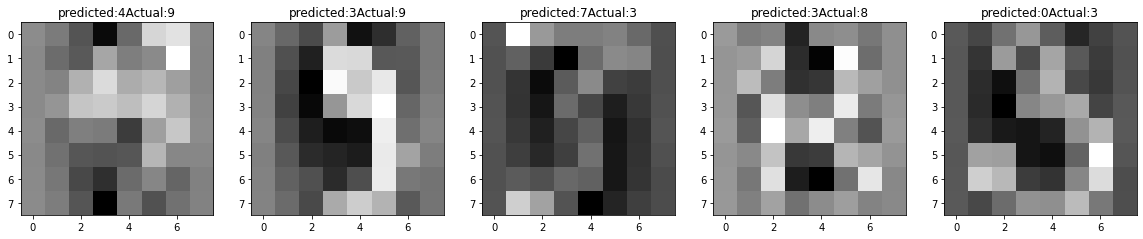

In [56]:
plot_misclassification(misclassification)

In [57]:
def get_misclassified_index(y_pred1,y_test):
    misclassification=[]
    for actual,(predicted,actual) in enumerate(zip(y_pred1,y_test)):
        if predicted!=actual:
            misclassification.append(actual)
    return misclassification

In [58]:
get_misclassified_index(y_pred,y_test)

[9,
 9,
 3,
 8,
 3,
 6,
 6,
 9,
 7,
 5,
 5,
 3,
 9,
 1,
 8,
 9,
 8,
 0,
 8,
 8,
 9,
 3,
 0,
 7,
 9,
 8,
 7,
 3,
 8,
 9,
 9,
 6,
 3,
 9,
 7,
 1,
 7,
 8,
 8,
 7,
 1,
 8,
 8,
 7,
 9,
 2,
 2,
 1,
 7,
 2,
 4,
 2,
 8,
 3,
 7,
 7,
 3]

In [59]:
get_misclassified_index(y_pred1,y_test)

[2,
 4,
 9,
 1,
 3,
 6,
 6,
 9,
 7,
 8,
 4,
 2,
 1,
 8,
 9,
 3,
 1,
 9,
 7,
 8,
 9,
 1,
 1,
 4,
 8,
 8,
 8,
 8,
 0,
 7,
 9,
 1,
 7,
 8,
 9,
 5,
 7,
 6,
 8,
 9,
 1,
 3,
 6,
 7,
 1,
 8,
 8,
 8,
 8,
 2,
 9,
 1,
 1,
 1,
 4,
 3,
 1,
 2,
 2,
 6]

In [60]:
a_w1=pd.DataFrame(columns={'y_pred1','y_test'})

In [61]:
a_w1['y_pred1']=y_pred1
a_w1['y_test']=y_test

In [62]:
a_w1['misclassified']=a_w1['y_test']!=a_w1['y_pred1']

In [63]:
a_w1

,y_pred1,y_test,misclassified
0,5,5,False
1,2,2,False
2,8,8,False
3,1,1,False
4,7,7,False
...,...,...,...
355,4,4,False
356,2,2,False
357,0,0,False
358,3,3,False


In [64]:
a_w1.loc[a_w1['y_test']==8].count()


y_pred1          35
y_test           35
misclassified    35
dtype: int64

In [65]:
a_w1.loc[a_w1['y_test']==8].value_counts()


y_pred1  y_test  misclassified
8        8       False            22
1        8       True              5
5        8       True              2
6        8       True              2
7        8       True              2
9        8       True              2
dtype: int64